In [ ]:
%pip install numpy matplotlib scipy

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

  Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp39-cp39-macosx_12_0_arm64.whl (30.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
def exp_logistic_map_2d(mu1, b1, mu2, b2, r, x0, y0, n):
    xs, ys = np.zeros(n), np.zeros(n)
    xs[0], ys[0] = x0, y0
    for i in range(1, n):
        xs[i] = mu1 * xs[i-1] * np.exp(-(xs[i-1] - b1)**2) + r * xs[i-1] * ys[i-1]
        ys[i] = mu2 * ys[i-1] * np.exp(-(ys[i-1] - b2)**2) + r * xs[i-1] * ys[i-1]
        xs[i] = np.clip(xs[i], -10, 10)
        ys[i] = np.clip(ys[i], -10, 10)
    return xs, ys

In [3]:
def plot_time_series(xs, ys, n_show=300):
    plt.figure(figsize=(10,3))
    plt.plot(xs[:n_show], label='x')
    plt.plot(ys[:n_show], label='y')
    plt.xlabel('n')
    plt.title('Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
def plot_phase_space(xs, ys, n_start=200):
    plt.figure(figsize=(5,5))
    plt.scatter(xs[n_start:], ys[n_start:], s=1, alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Phase Space')
    plt.show()

In [5]:
def plot_histogram(xs, ys, bins=40):
    plt.figure(figsize=(10,4))
    plt.hist(xs, bins=bins, alpha=0.6, label='x', color='blue')
    plt.hist(ys, bins=bins, alpha=0.6, label='y', color='orange')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of x and y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
def bifurcation_diagram_2d(mu1_range, mu2, b1, b2, r, x0, y0, n_iter=600, n_show=40):
    xs_plot, mus = [], []
    for mu1 in mu1_range:
        xs, ys = exp_logistic_map_2d(mu1, b1, mu2, b2, r, x0, y0, n_iter)
        xs_plot.extend(xs[-n_show:])
        mus.extend([mu1]*n_show)
    plt.figure(figsize=(10,4))
    plt.scatter(mus, xs_plot, s=0.2, c='blue')
    plt.xlabel('mu1')
    plt.ylabel('x')
    plt.title(f'Bifurcation Diagram (vary mu1, mu2={mu2})')
    plt.show()

In [7]:
def plot_histogram(xs, ys, bins=40):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,4))
    plt.hist(xs, bins=bins, alpha=0.6, label='x', color='blue')
    plt.hist(ys, bins=bins, alpha=0.6, label='y', color='orange')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of x and y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
def bifurcation_diagram_2d(mu1_range, mu2, b1, b2, r, x0, y0, n_iter=600, n_show=40):
    xs_plot, mus = [], []
    for mu1 in mu1_range:
        xs, ys = exp_logistic_map_2d(mu1, b1, mu2, b2, r, x0, y0, n_iter)
        xs_plot.extend(xs[-n_show:])
        mus.extend([mu1]*n_show)
    plt.figure(figsize=(10,4))
    plt.scatter(mus, xs_plot, s=0.2, c='blue')
    plt.xlabel('mu1')
    plt.ylabel('x')
    plt.title(f'Bifurcation Diagram (vary mu1, mu2={mu2})')
    plt.show()

In [9]:
def plot_sensitivity_initial_condition(mu1, b1, mu2, b2, r, x0, y0, delta=1e-7, n=300):
    xs1, ys1 = exp_logistic_map_2d(mu1, b1, mu2, b2, r, x0, y0, n)
    xs2, ys2 = exp_logistic_map_2d(mu1, b1, mu2, b2, r, x0 + delta, y0, n)
    diff = np.abs(xs1 - xs2)
    plt.figure(figsize=(10,4))
    plt.plot(diff, label=f'|x₁ - x₂|, δ={delta}')
    plt.yscale('log')
    plt.title('Sensitivitas Initial Condition (log scale)')
    plt.xlabel('step n')
    plt.ylabel('Absolute difference (log scale)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
def plot_autocorrelation(xs, max_lag=50):
    xs = (xs - np.mean(xs)) / np.std(xs)
    corrs = [np.correlate(xs[:-lag], xs[lag:])[0] / (len(xs)-lag)
             if lag > 0 else 1 for lag in range(max_lag)]
    plt.figure(figsize=(8,4))
    markerline, stemlines, baseline = plt.stem(range(max_lag), corrs)
    plt.setp(markerline, marker='o', markersize=4)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Decay')
    plt.grid(True)
    plt.show()

In [11]:
def plot_power_spectrum(xs):
    n = len(xs)
    xs = xs - np.mean(xs)
    fft_vals = np.abs(fft(xs))[:n//2]
    freqs = fftfreq(n)[:n//2]
    plt.figure(figsize=(8,4))
    plt.plot(freqs, fft_vals)
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.title('Power Spectrum')
    plt.grid(True)
    plt.show()

In [12]:
def lyapunov_exponent_2d(mu1, b1, mu2, b2, r, x0, y0, n):
    xs, ys = np.zeros(n), np.zeros(n)
    xs[0], ys[0] = x0, y0
    le_sum = 0.0
    for i in range(1, n):
        xs[i] = mu1 * xs[i-1] * np.exp(-(xs[i-1] - b1)**2) + r * xs[i-1] * ys[i-1]
        ys[i] = mu2 * ys[i-1] * np.exp(-(ys[i-1] - b2)**2) + r * xs[i-1] * ys[i-1]
        dfdx = mu1 * np.exp(-(xs[i-1]-b1)**2) * (1 - 2*xs[i-1]*(xs[i-1]-b1)) + r*ys[i-1]
        dfdx = abs(dfdx)
        if dfdx > 0:
            le_sum += np.log(dfdx)
    return le_sum/(n-1)

def lyapunov_diagram(mu1_range, mu2, b1, b2, r, x0, y0, n_iter=600):
    les = [lyapunov_exponent_2d(mu1, b1, mu2, b2, r, x0, y0, n_iter) for mu1 in mu1_range]
    plt.figure(figsize=(10,4))
    plt.plot(mu1_range, les, lw=1)
    plt.xlabel('mu1')
    plt.ylabel('Lyapunov Exponent (x)')
    plt.title(f'Lyapunov Diagram (vary mu1, mu2={mu2})')
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()

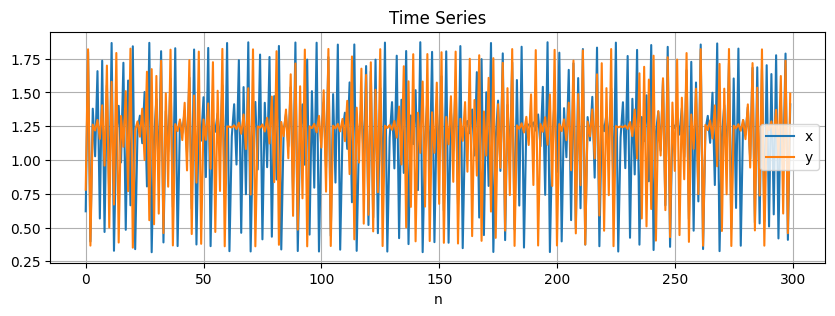

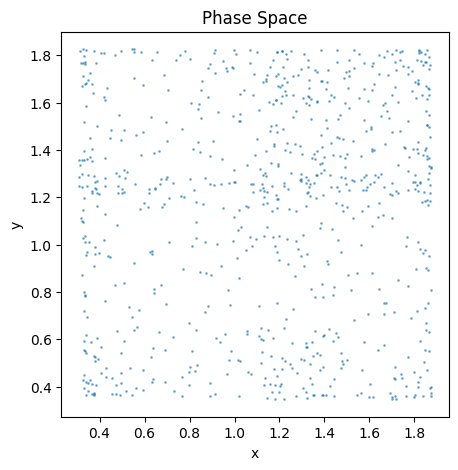

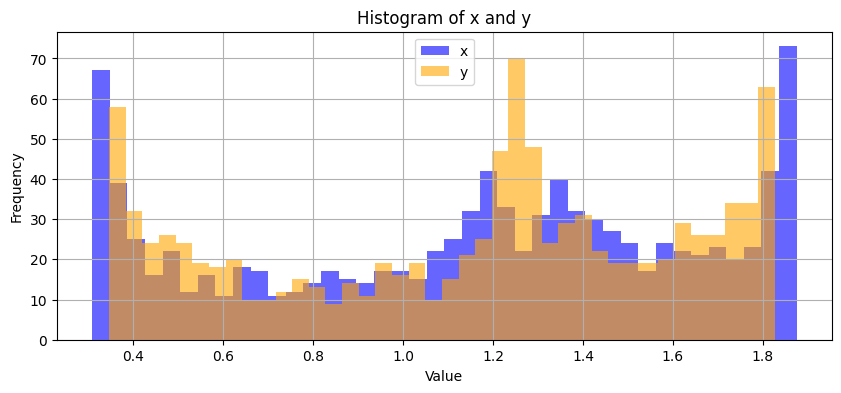

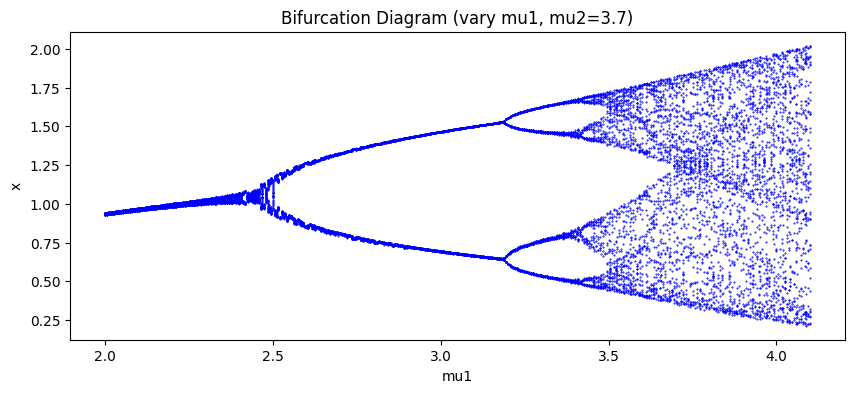

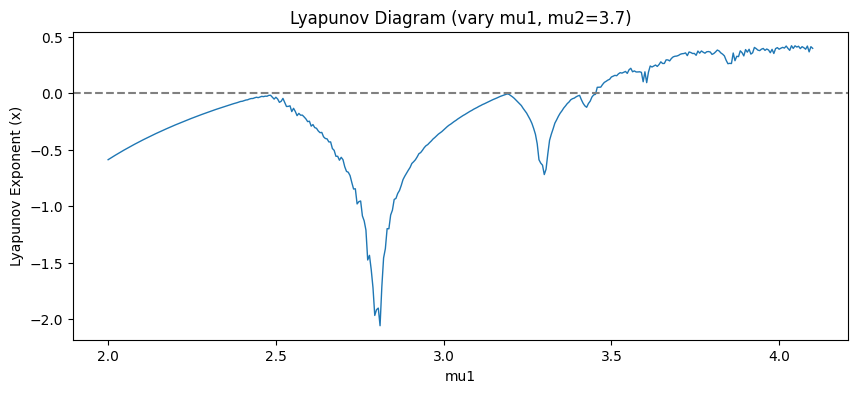

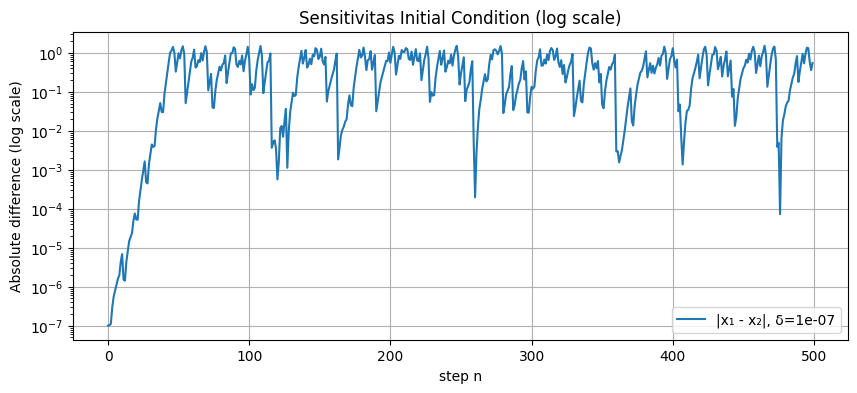

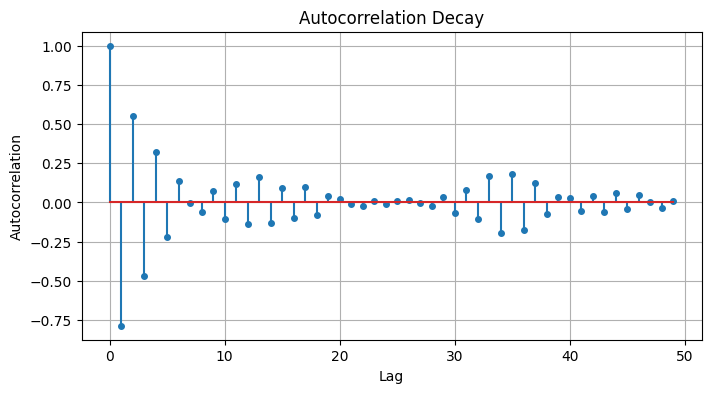

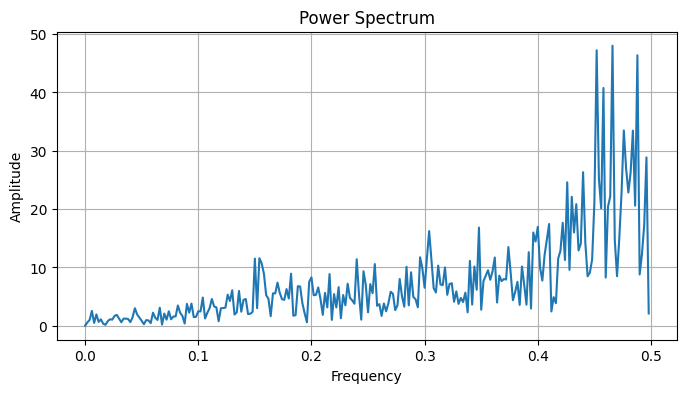

In [13]:
# Pilih parameter yang chaotic
mu1, b1 = 3.8, 0.1
mu2, b2 = 3.7, 0.1
r = 0.005
x0, y0 = 0.62, 0.78
n = 1000

# Simulasi
xs, ys = exp_logistic_map_2d(mu1, b1, mu2, b2, r, x0, y0, n)

plot_time_series(xs, ys)
plot_phase_space(xs, ys)
plot_histogram(xs, ys)

# Bifurcation & Lyapunov
mu1_range = np.linspace(2.0, 4.1, 400)
bifurcation_diagram_2d(mu1_range, mu2, b1, b2, r, x0, y0, n_iter=600, n_show=40)
lyapunov_diagram(mu1_range, mu2, b1, b2, r, x0, y0, n_iter=600)

# Sensitivitas initial condition
plot_sensitivity_initial_condition(mu1, b1, mu2, b2, r, x0, y0, delta=1e-7, n=500)

# Autocorrelation
plot_autocorrelation(xs[-500:])

# Power spectrum
plot_power_spectrum(xs[-500:])